In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input, Concatenate, UpSampling2D

In [14]:
img_height, img_width = 256, 256
def normalize(input_image):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  return input_image


def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img,channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

def decode_mask_img(img):
  # convert the compressed string to a 2D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=1)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/table/

/content/drive/MyDrive/table


In [3]:
from tablenet import TableNet

In [11]:
list_ds = tf.data.Dataset.list_files('data/images/*.PNG',shuffle=False)


In [16]:
def loadimages(path):
    img = normalize(decode_img(tf.io.read_file(path)))
    #print(file_path)
    path = tf.strings.regex_replace(path, 'images', 'masks')
    return img, {'path':path}


In [17]:
dataset=list_ds.map(loadimages)

In [ ]:
list(dataset.take(1))


In [20]:
dataset.batch(1)

<BatchDataset shapes: ((None, 256, 256, 3), {path: (None,)}), types: (tf.float32, {path: tf.string})>

In [38]:
import numpy as np

def create_mask(pred_mask1):
  pred_mask1 = tf.argmax(pred_mask1, axis=-1)
  pred_mask1 = pred_mask1[..., tf.newaxis]
  return pred_mask1[0]

def show_predictions(model,dataset, num=1):
    for image,path in dataset.take(num):
        print(image.shape)
        image=np.reshape(image,((1, 256, 256, 3)))
        pred_mask1 = model.predict(image, verbose=1)
        table_mask= create_mask(pred_mask1)
        display([image[0], table_mask])
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'Table Mask' 
  ]

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()


(256, 256, 3)
1/1 [==============================] - 1s 1s/step


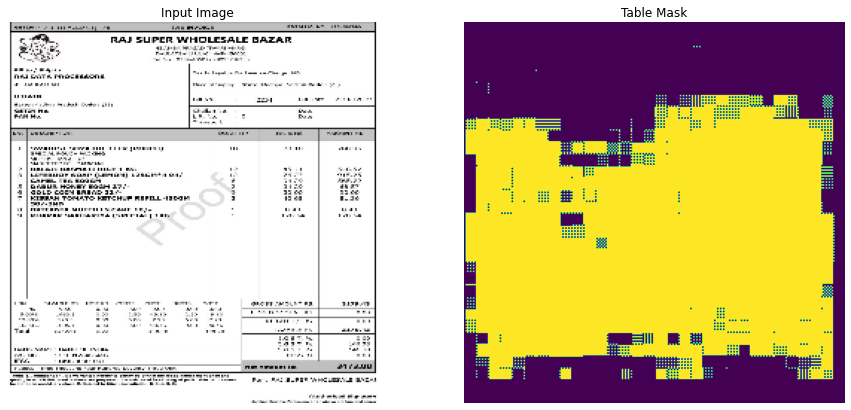

(256, 256, 3)
1/1 [==============================] - 1s 905ms/step


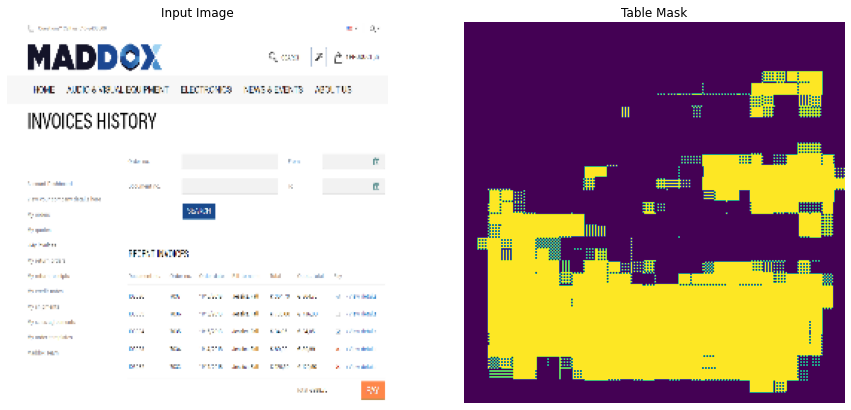

(256, 256, 3)
1/1 [==============================] - 1s 892ms/step


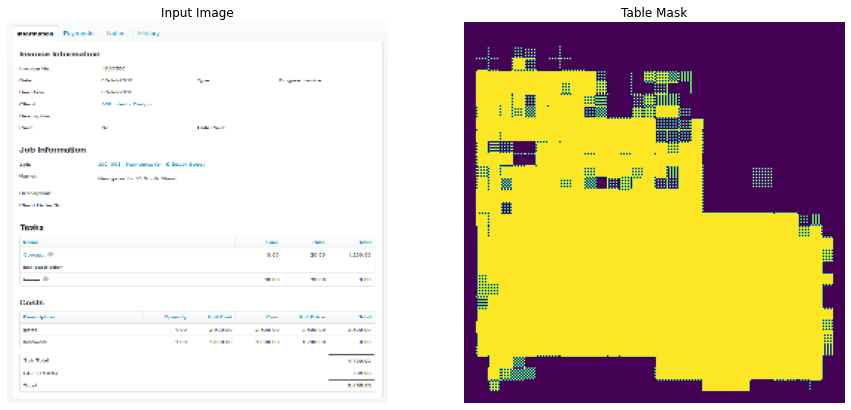

In [40]:
model = TableNet.build()
model.compile()
model.load_weights('models/mymodel_874.h5')
show_predictions(model,dataset,3)

(256, 256, 3)
1/1 [==============================] - 1s 1s/step


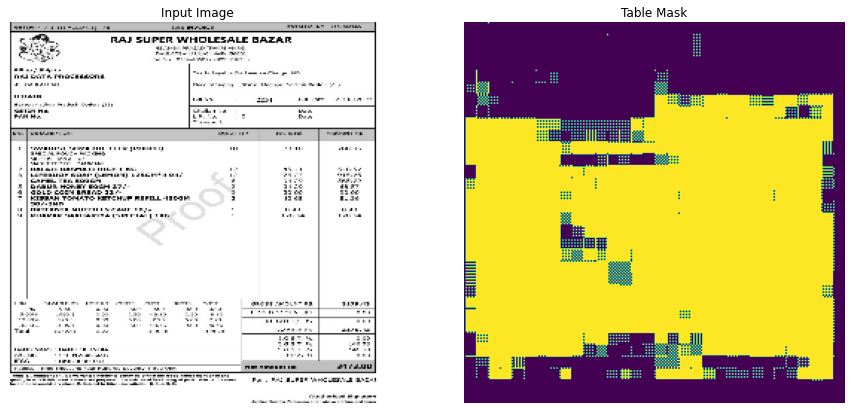

(256, 256, 3)
1/1 [==============================] - 1s 906ms/step


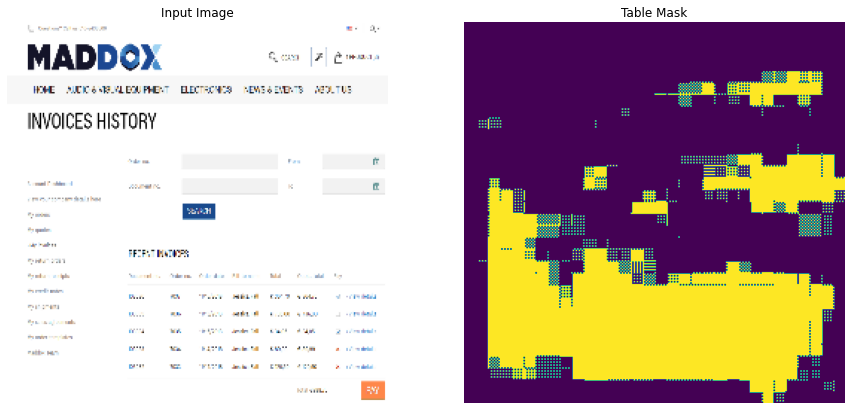

(256, 256, 3)
1/1 [==============================] - 1s 909ms/step


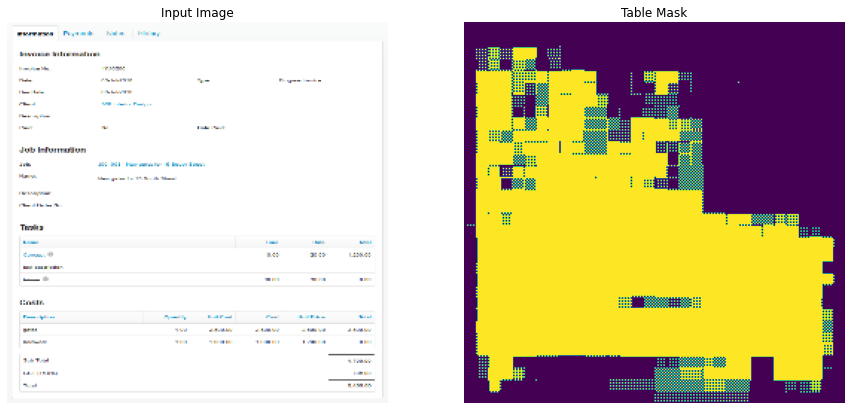

In [41]:
model = TableNet.build()
model.compile()
model.load_weights('models/mymodel_9.h5')
show_predictions(model,dataset,3)

(256, 256, 3)
1/1 [==============================] - 1s 1s/step


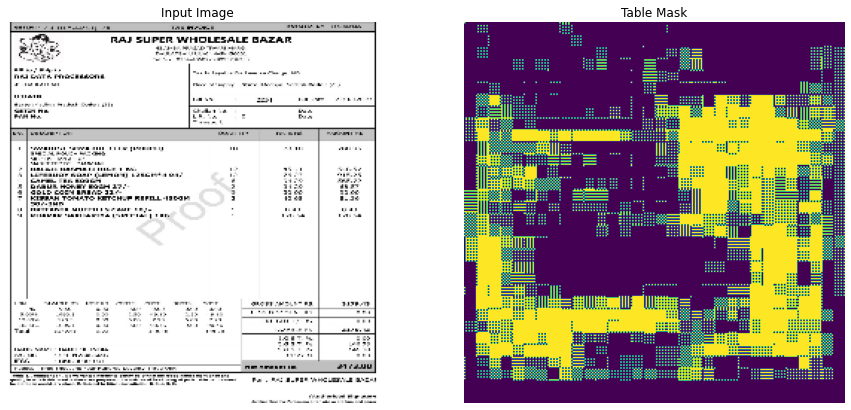

(256, 256, 3)
1/1 [==============================] - 1s 939ms/step


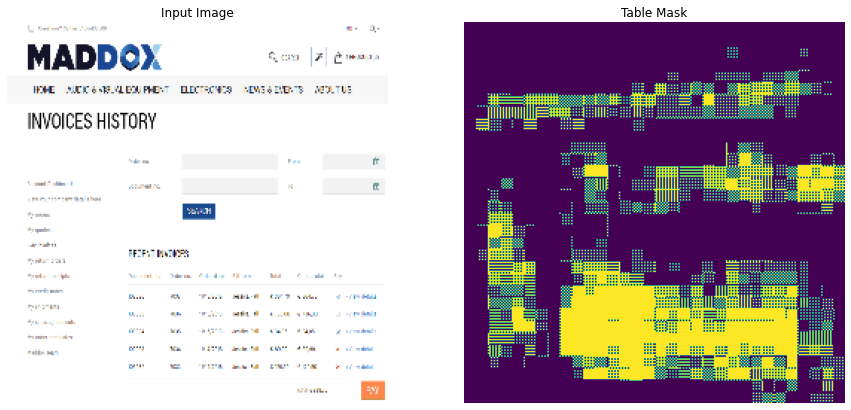

(256, 256, 3)
1/1 [==============================] - 1s 1s/step


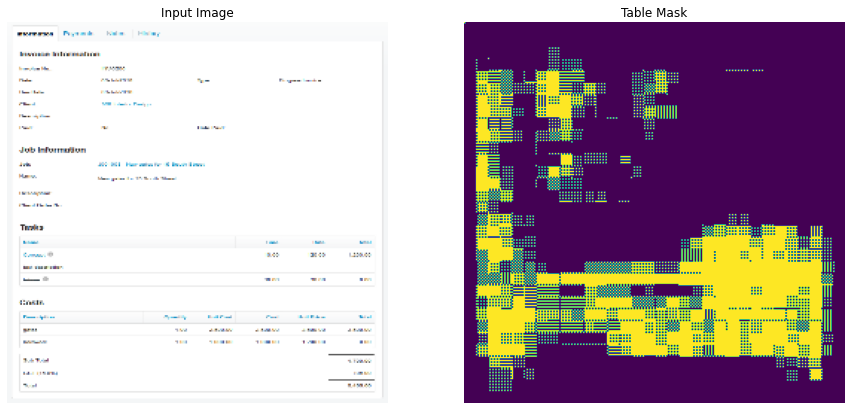

In [42]:
#/content/drive/MyDrive/table/models/myacccuratemodel1_54.h5
model = TableNet.build()
model.compile()
model.load_weights('models/myacccuratemodel1_54.h5')
show_predictions(model,dataset,3)

(256, 256, 3)
1/1 [==============================] - 1s 1s/step


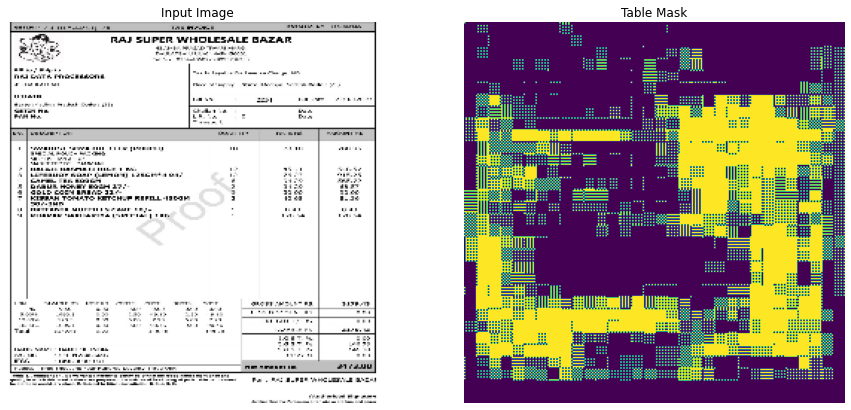

(256, 256, 3)
1/1 [==============================] - 1s 926ms/step


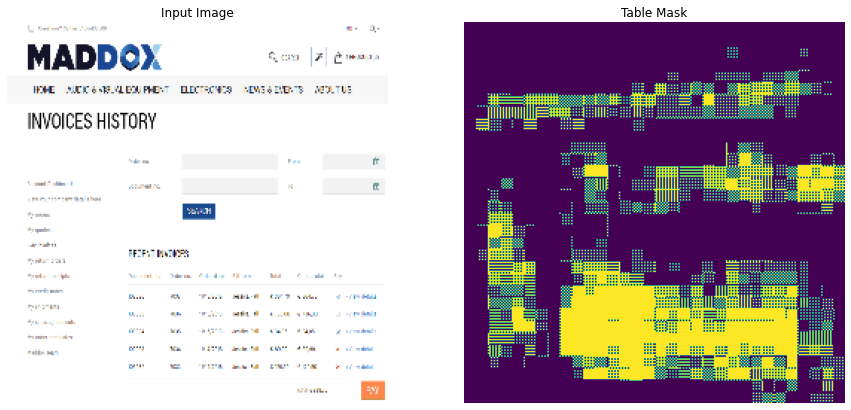

(256, 256, 3)
1/1 [==============================] - 1s 927ms/step


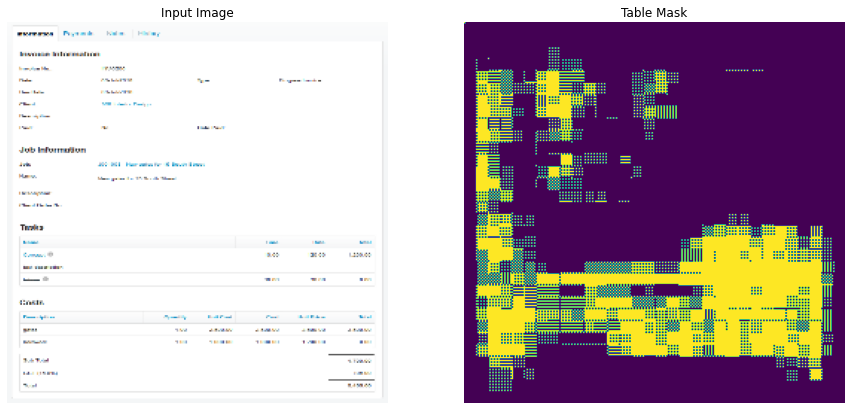

In [43]:
model = TableNet.build()
model.compile()
model.load_weights('models/myacccuratemodel1_54.h5')
show_predictions(model,dataset,3)

In [59]:
import cv2
model = TableNet.build()
model.compile()
model.load_weights('models/mymodel_9.h5')
def predict(path):
  img = normalize(decode_img(tf.io.read_file(path)))
  img=np.reshape(img,(1,256,256,3))
  mask=model.predict(img)
  path = tf.strings.regex_replace(path, 'images', 'masks')
  print(img.shape,mask.shape)
  display([img[0],maks[0]])
  #cv2.imwrite(path,mask[0])



In [ ]:
import os
for path in os.listdir('data/images/'):
  path="data/images/"+path
  print(path)
  #predict(path)


KeyboardInterrupt: ignored

In [ ]:
predict('data/images/00245.PNG')